# Space Server Dataset

Here as a problem Statement suggest we have to go for classification technics to analysis Data . 
So first we can load all the basic directories.

In [150]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score,classification_report

In [127]:
df_sp=pd.read_csv("Space_dataset.csv")
df_sp

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


Here Data set has 10000 rows and 18 Columns

In [128]:
df_space=df_sp.rename(columns={'objid':'Object Identifier','ra':'J2000 Right Ascension (r-band)','dec':'J2000 Declination (r-band)','u':'better of DeV/Exp magnitude fit','g':'better of DeV/Exp magnitude fit','r':'better of DeV/Exp magnitude fit','i':'better of DeV/Exp magnitude fit','z':'better of DeV/Exp magnitude fit','run':'Run Number','rerun':'Rerun Number','camcol':'Camera column','field':'Field number','specobjid':'Object Identifier','class':'object class','redshift':'Final Redshift','plate':'plate number','mjd':'MJD of observation','fiberid':'fiber ID'})

In [129]:
df_space

,Object Identifier,J2000 Right Ascension (r-band),J2000 Declination (r-band),better of DeV/Exp magnitude fit,better of DeV/Exp magnitude fit,better of DeV/Exp magnitude fit,better of DeV/Exp magnitude fit,better of DeV/Exp magnitude fit,Run Number,Rerun Number,Camera column,Field number,Object Identifier,object class,Final Redshift,plate number,MJD of observation,fiber ID
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


Now we can rename Data set according to the Data description

In [130]:
df_space.describe()

,Object Identifier,J2000 Right Ascension (r-band),J2000 Declination (r-band),better of DeV/Exp magnitude fit,better of DeV/Exp magnitude fit,better of DeV/Exp magnitude fit,better of DeV/Exp magnitude fit,better of DeV/Exp magnitude fit,Run Number,Rerun Number,Camera column,Field number,Object Identifier,Final Redshift,plate number,MJD of observation,fiber ID
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


Now we can check for data for mean std and max parameters

In [131]:
df_space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Object Identifier                10000 non-null  float64
 1   J2000 Right Ascension (r-band)   10000 non-null  float64
 2   J2000 Declination (r-band)       10000 non-null  float64
 3   better of DeV/Exp magnitude fit  10000 non-null  float64
 4   better of DeV/Exp magnitude fit  10000 non-null  float64
 5   better of DeV/Exp magnitude fit  10000 non-null  float64
 6   better of DeV/Exp magnitude fit  10000 non-null  float64
 7   better of DeV/Exp magnitude fit  10000 non-null  float64
 8   Run Number                       10000 non-null  int64  
 9   Rerun Number                     10000 non-null  int64  
 10  Camera column                    10000 non-null  int64  
 11  Field number                     10000 non-null  int64  
 12  Object Identifier  

In [132]:
df_space.keys()

Index(['Object Identifier', 'J2000 Right Ascension (r-band)',
       'J2000 Declination (r-band)', 'better of DeV/Exp magnitude fit',
       'better of DeV/Exp magnitude fit', 'better of DeV/Exp magnitude fit',
       'better of DeV/Exp magnitude fit', 'better of DeV/Exp magnitude fit',
       'Run Number', 'Rerun Number', 'Camera column', 'Field number',
       'Object Identifier', 'object class', 'Final Redshift', 'plate number',
       'MJD of observation', 'fiber ID'],
      dtype='object')

In [133]:
df_space.isnull()

,Object Identifier,J2000 Right Ascension (r-band),J2000 Declination (r-band),better of DeV/Exp magnitude fit,better of DeV/Exp magnitude fit,better of DeV/Exp magnitude fit,better of DeV/Exp magnitude fit,better of DeV/Exp magnitude fit,Run Number,Rerun Number,Camera column,Field number,Object Identifier,object class,Final Redshift,plate number,MJD of observation,fiber ID
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [134]:
df_space.isnull().sum()

Object Identifier                  0
J2000 Right Ascension (r-band)     0
J2000 Declination (r-band)         0
better of DeV/Exp magnitude fit    0
better of DeV/Exp magnitude fit    0
better of DeV/Exp magnitude fit    0
better of DeV/Exp magnitude fit    0
better of DeV/Exp magnitude fit    0
Run Number                         0
Rerun Number                       0
Camera column                      0
Field number                       0
Object Identifier                  0
object class                       0
Final Redshift                     0
plate number                       0
MJD of observation                 0
fiber ID                           0
dtype: int64

In [135]:
le=LabelEncoder()
df_space['object class']=le.fit_transform(df_space['object class'])
df_space['object class']

0       2
1       2
2       0
3       2
4       2
       ..
9995    0
9996    0
9997    2
9998    0
9999    0
Name: object class, Length: 10000, dtype: int32


# EDA 

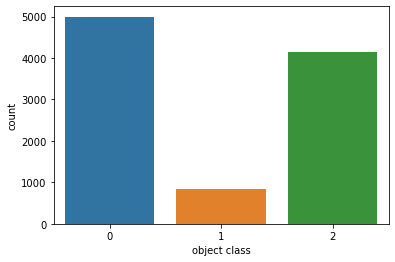

In [136]:
import seaborn as sns
sns.countplot(df_space['object class'])

,Object Identifier,J2000 Right Ascension (r-band),J2000 Declination (r-band),better of DeV/Exp magnitude fit,better of DeV/Exp magnitude fit,better of DeV/Exp magnitude fit,better of DeV/Exp magnitude fit,better of DeV/Exp magnitude fit,Run Number,Rerun Number,Camera column,Field number,Object Identifier,object class,Final Redshift,plate number,MJD of observation,fiber ID
Object Identifier,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,-3.355500e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
J2000 Right Ascension (r-band),2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,-4.321896e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
J2000 Declination (r-band),-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,-5.891815e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
better of DeV/Exp magnitude fit,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,-2.690437e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
better of DeV/Exp magnitude fit,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,-9.921163e-02,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
better of DeV/Exp magnitude fit,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,4.962769e-02,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
better of DeV/Exp magnitude fit,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,1.467908e-01,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
better of DeV/Exp magnitude fit,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,2.157584e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
Run Number,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,-7.816172e-02,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
Rerun Number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


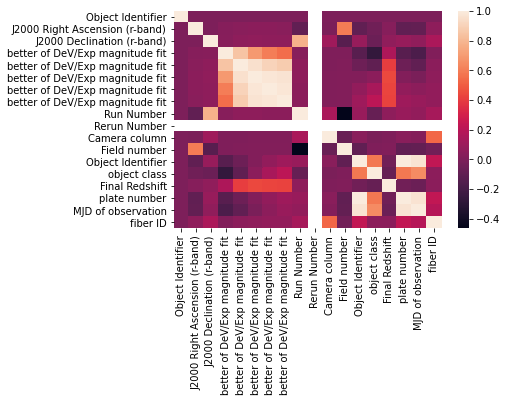

In [137]:
sns.heatmap(df_space.corr())
df_space.corr()

Here we can infer that we can drop Run Number

In [138]:
df_space = df_space.drop(['Rerun Number'],axis=1)

In [139]:
df_space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Object Identifier                10000 non-null  float64
 1   J2000 Right Ascension (r-band)   10000 non-null  float64
 2   J2000 Declination (r-band)       10000 non-null  float64
 3   better of DeV/Exp magnitude fit  10000 non-null  float64
 4   better of DeV/Exp magnitude fit  10000 non-null  float64
 5   better of DeV/Exp magnitude fit  10000 non-null  float64
 6   better of DeV/Exp magnitude fit  10000 non-null  float64
 7   better of DeV/Exp magnitude fit  10000 non-null  float64
 8   Run Number                       10000 non-null  int64  
 9   Camera column                    10000 non-null  int64  
 10  Field number                     10000 non-null  int64  
 11  Object Identifier                10000 non-null  float64
 12  object class       

Before performing Scalling we perform Data split into X and Y  

In [140]:
y=df_space['object class']
y

0       2
1       2
2       0
3       2
4       2
       ..
9995    0
9996    0
9997    2
9998    0
9999    0
Name: object class, Length: 10000, dtype: int32

In [141]:
x=df_space.drop('object class', axis=1)
x

,Object Identifier,J2000 Right Ascension (r-band),J2000 Declination (r-band),better of DeV/Exp magnitude fit,better of DeV/Exp magnitude fit,better of DeV/Exp magnitude fit,better of DeV/Exp magnitude fit,better of DeV/Exp magnitude fit,Run Number,Camera column,Field number,Object Identifier,Final Redshift,plate number,MJD of observation,fiber ID
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,5.033450e+17,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,5.033400e+17,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,3,162,8.222620e+18,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,5.033400e+17,0.014019,447,51877,229


We can use standard Scaler to perfrom data scaling

In [142]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
x= scaler.fit_transform(x)

In [143]:
#Splitting data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=44, shuffle =True)

In [144]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6700, 16)
(3300, 16)
(6700,)
(3300,)


In [147]:
# Logistic Regression
lr = LogisticRegression(C=2, max_iter=1500)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print("Accuracy when we are using Logistic Regression= ", accuracy_score(y_test,y_pred))
print("********************************************************************************************")
# KNN Neighbour Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy when we are using KNeighborsClassifier = ", accuracy_score(y_test,y_pred))
print("********************************************************************************************")
#Random Forest Classifier
rf = RandomForestClassifier(max_depth=18, n_estimators=120)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("Accuracy of RandomForestClassifier = ", accuracy_score(y_test,y_pred))

Accuracy when we are using Logistic Regression=  0.9812121212121212
********************************************************************************************
Accuracy when we are using KNeighborsClassifier =  0.8963636363636364
********************************************************************************************
Accuracy of RandomForestClassifier =  0.9875757575757576


Now we can calculate Confusion matrix

In [148]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', cm)

Confusion Matrix is : 
 [[1616    9   11]
 [  20  285    0]
 [   1    0 1358]]


In [149]:
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  3259


In [152]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1636
           1       0.97      0.93      0.95       305
           2       0.99      1.00      1.00      1359

    accuracy                           0.99      3300
   macro avg       0.98      0.97      0.98      3300
weighted avg       0.99      0.99      0.99      3300



In [153]:
import joblib
joblib.dump(rf,"spaceproject.pkl")

['spaceproject.pkl']

Best Suited Model for this project is Random Forest Classifier